# Cluster Analysis Review

Sample Data:
   Clicks  Amount Spent
0      52    111.831797
1      93     60.812818
2      15    169.469971
3      72    471.511942
4      61    162.278263


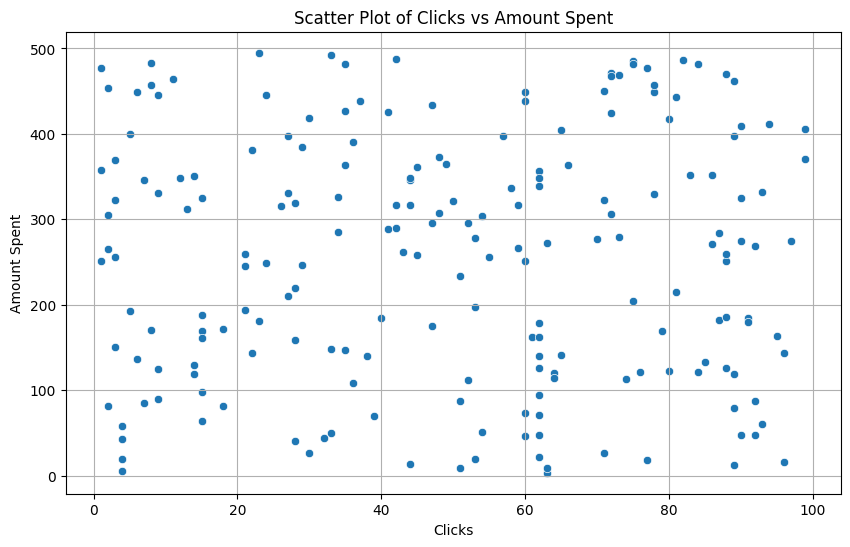

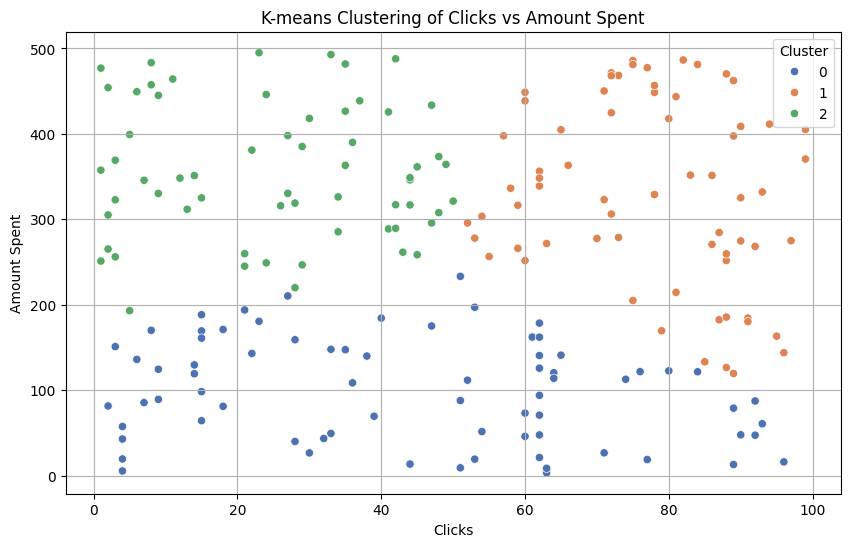

Cluster Centers:
      Clicks  Amount Spent
0  44.095890     99.737476
1  77.484848    330.805118
2  25.245902    355.390848

Cluster Summary:
   Cluster  Count  Avg_Clicks  Avg_Amount_Spent
0        0     73   44.095890         99.737476
1        1     66   77.484848        330.805118
2        2     61   25.245902        355.390848
Cluster 0.0: Count = 73.0, Avg Clicks = 44.10, Avg Amount Spent = 99.74
Cluster 1.0: Count = 66.0, Avg Clicks = 77.48, Avg Amount Spent = 330.81
Cluster 2.0: Count = 61.0, Avg Clicks = 25.25, Avg Amount Spent = 355.39


In [1]:
# Cluster_Analysis_Review.py

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set the random seed for reproducibility
np.random.seed(42)

# Generate sample data: Amount Spent vs. Clicks
# Here we create a DataFrame with sample data
data = {
    'Clicks': np.random.randint(1, 100, 200),  # Independent variable
    'Amount Spent': np.random.uniform(1, 500, 200)  # Dependent variable
}

df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("Sample Data:")
print(df.head())

# Step 1: Data Exploration
# Visualizing the initial data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Clicks', y='Amount Spent')
plt.title('Scatter Plot of Clicks vs Amount Spent')
plt.xlabel('Clicks')
plt.ylabel('Amount Spent')
plt.grid()
plt.show()

# Step 2: Standardizing the data
# Standardizing the features (important for K-means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: K-means clustering
# Choosing the number of clusters (K)
# For this example, we'll try 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Clicks', y='Amount Spent', hue='Cluster', palette='deep')
plt.title('K-means Clustering of Clicks vs Amount Spent')
plt.xlabel('Clicks')
plt.ylabel('Amount Spent')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Step 5: Cluster Centers
# Getting the coordinates of the cluster centers
centers = kmeans.cluster_centers_
# Inverse transforming the centers to original scale
centers_original = scaler.inverse_transform(centers)

# Display cluster centers
print("Cluster Centers:")
print(pd.DataFrame(centers_original, columns=['Clicks', 'Amount Spent']))

# Step 6: Summary of Cluster Characteristics
cluster_summary = df.groupby('Cluster').agg(
    Count=('Cluster', 'size'),
    Avg_Clicks=('Clicks', 'mean'),
    Avg_Amount_Spent=('Amount Spent', 'mean')
).reset_index()

print("\nCluster Summary:")
print(cluster_summary)

# Step 7: Interpret Results
# Display the summary of clusters
for index, row in cluster_summary.iterrows():
    print(f"Cluster {row['Cluster']}: Count = {row['Count']}, Avg Clicks = {row['Avg_Clicks']:.2f}, Avg Amount Spent = {row['Avg_Amount_Spent']:.2f}")
